
## Homework 4: kNN. Linear models. Feature engineering

Rules:

* Homework is worth 10 points.

* You may use without proof any results found in lectures or seminars in the course, as long as obtaining these results is not the question of the assignment.

* You may use any free sources with *mandatory* citation.

* Plagiarism is not allowed. If cheating is detected, a 0 for the work will be given to everyone involved, even if it is possible to identify who cheated from whom.

* Try to make the code as optimal as possible. In particular, you will be penalized for using loops in cases where the operation can be performed using the library tools described in the course.  

### Assignment 1: Visualization of solving surfaces in kNN.

In this assignment, we depict the decision surface for the kNN classifier to visualize how the classifier makes decisions for new objects. For simplicity, we will work with the `wine` dataset built into `sklearn`, which contains information about the characteristics of three types of wine. The description of the set can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) and [here](https://rdrr.io/cran/rattle.data/man/wine.html). 

Let's load the dataset and store the information about the traits into variable `X` and about the dependent variable into variable `y`.

In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [385]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Task 1.1 (0.5 points)** Are there any missing values in the data set? If yes, delete them. Are there any categorical variables in the dataset? If yes, encode them using OneHot coding.

In [386]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [387]:
np.isnan(y).any()

False

No missing values in both X and Y

In [388]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

**Task 1.2 (0.5 points)** Using the `train_test_split()` function, split the sample into training and test samples, and set the proportion of the test sample to 0.3. Since the splitting is done randomly, remember to fix `np.random.seed()` for reproducibility of the results.

In [389]:
from sklearn.model_selection import train_test_split

In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

**Task 1.3 (1 point)** Train six kNN classifiers on the training sample, differing only in the number of neighbors. For the first classifier, set the number of neighbors to 1, for the second classifier to 3, for the third classifier to 5, for the fourth classifier to 10, for the fifth classifier to 15, and for the sixth classifier to 25 (pay attention to the `n_neighbours` parameter of the `KNeighborsClassifier` class). Use only two traits for training: `alcohol` and `magnesium` - and the Euclidean distance. Don't forget to scale the features, for example, using the `StandardScaler` module.

Output the proportion of correct answers in the training and test samples for each classifier.

In [391]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [392]:
scaler = StandardScaler()
x_tr_s = X_train.loc[:, ['alcohol', 'magnesium']]
x_tst_s = X_test.loc[:, ['alcohol', 'magnesium']]

#train
x_tr_s.loc[:, :]= scaler.fit_transform(x_tr_s )
#test
x_tst_s.loc[:, :] = scaler.fit_transform(x_tst_s)

In [393]:
models = []
print('NN', 'Train', 'Test', sep='    ')
for i in [1, 3, 5, 10, 15, 25]:
    knn = KNeighborsClassifier(p=2, n_neighbors=i)
    knn.fit(x_tr_s.to_numpy(), y_train)
    models.append(knn)
    train_pred = knn.predict(x_tr_s.to_numpy())
    test_pred = knn.predict(x_tst_s.to_numpy())
    print(i, accuracy_score(y_train, train_pred).round(2), accuracy_score(y_test, test_pred).round(2), sep ='     ')
        

NN    Train    Test
1     1.0     0.63
3     0.87     0.67
5     0.86     0.65
10     0.77     0.7
15     0.74     0.69
25     0.74     0.72


**Task 1.4 (0 points)** Install the `mlxtend` library with the command below. The library can also be installed from the terminal using `pip` or `conda` as specified [here](http://rasbt.github.io/mlxtend/installation/). 

In [394]:
!pip install mlxtend

If everything was successful, you will see a message like “successfully installed” in the command output above, and the next cell will execute without errors.

In [395]:
import mlxtend

**Task 1.5 (1 point)** The `mlxtend` library allows you to visualize the decision surfaces of trained classifiers quite easily. Study the [documentation](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) of the library and find how to build several graphs of decision surfaces on a grid (decision regions grid). Build such a grid of graphs for the classifiers trained above.

**Hints:**
1. You can use the ready code given in the documentation and adapt it for our case.
2. You may need additional libraries that are used in the example from the documentation.
3. Note how you need to modify the parameters `gridspec.GridSpec()` and `itertools.product()` for our number of qualifiers. 
4. In `plot_decision_region()`, use `y_train` and the necessary columns from `X_train`. You may have to convert them to `numpy` array format.
5. If you save the trained classifiers in task 1.3 to a list, there will be no need to re-train them. 
6. Plotting the graph may take some time - you'll have to wait a bit!

In [396]:
import itertools
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec


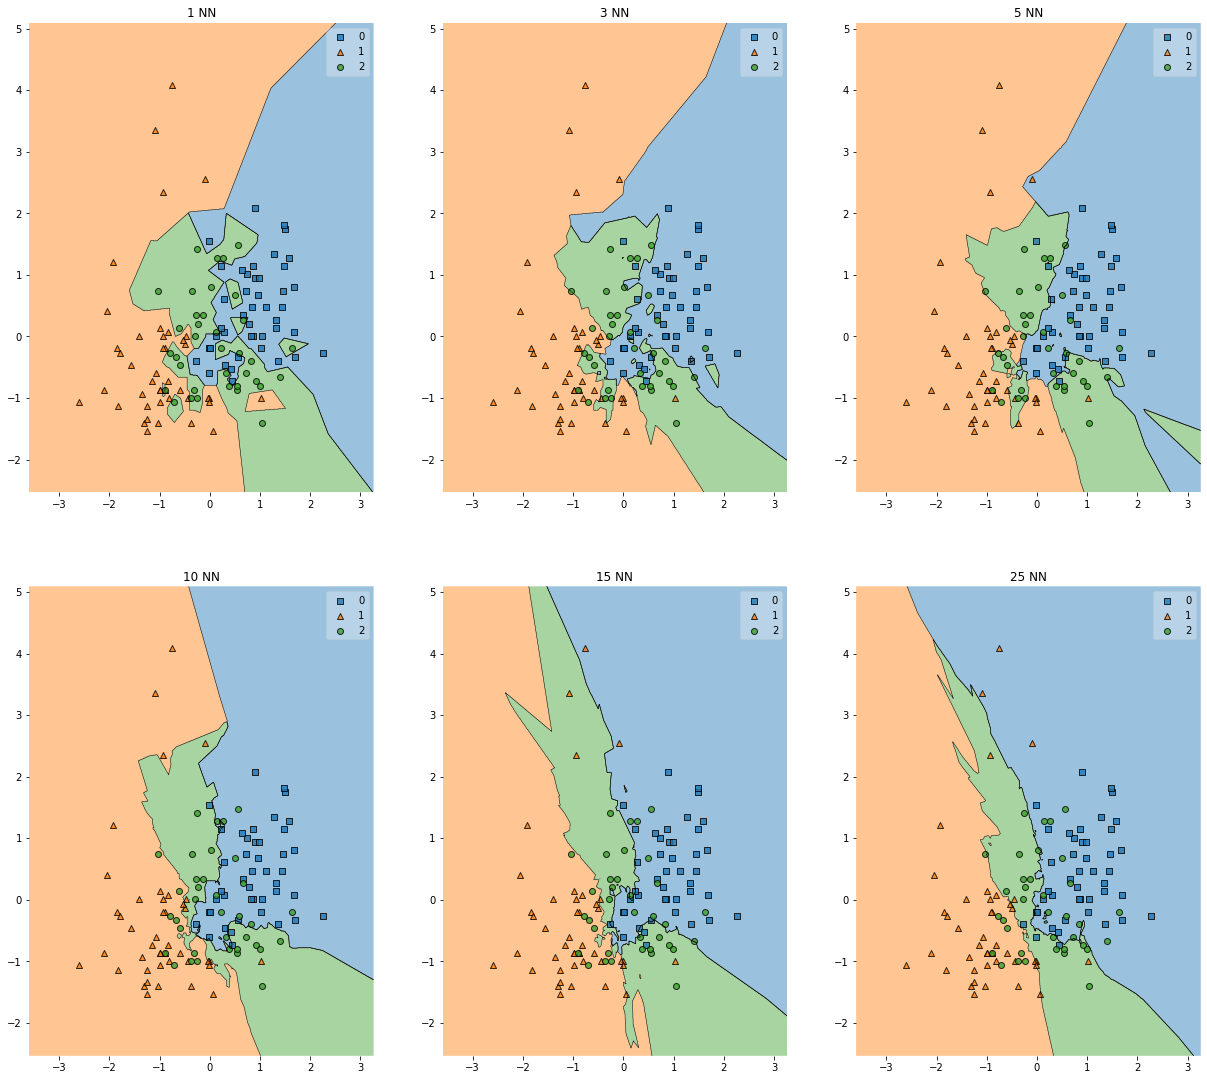

In [397]:
gs= gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(21,19))

labels = ['1 NN', '3 NN', '5 NN', '10 NN', '15 NN', '25 NN']
for clf, lab, grd in zip(models, labels, itertools.product([0, 1, 2], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x_tr_s.to_numpy(), y=y_train, clf=clf, legend=1)
    plt.title(lab)

**Problem 1.6 (0.5 points)** Comment on the results obtained in Problems 1.3 and 1.5. What is the optimal number of neighbors to use for classifier training? Explain your choice by describing the data geometry and the resulting solving surface.

#### To be more confident in the results, I will draw the decisive surfaces for more neighbors and take them into consideration for the result

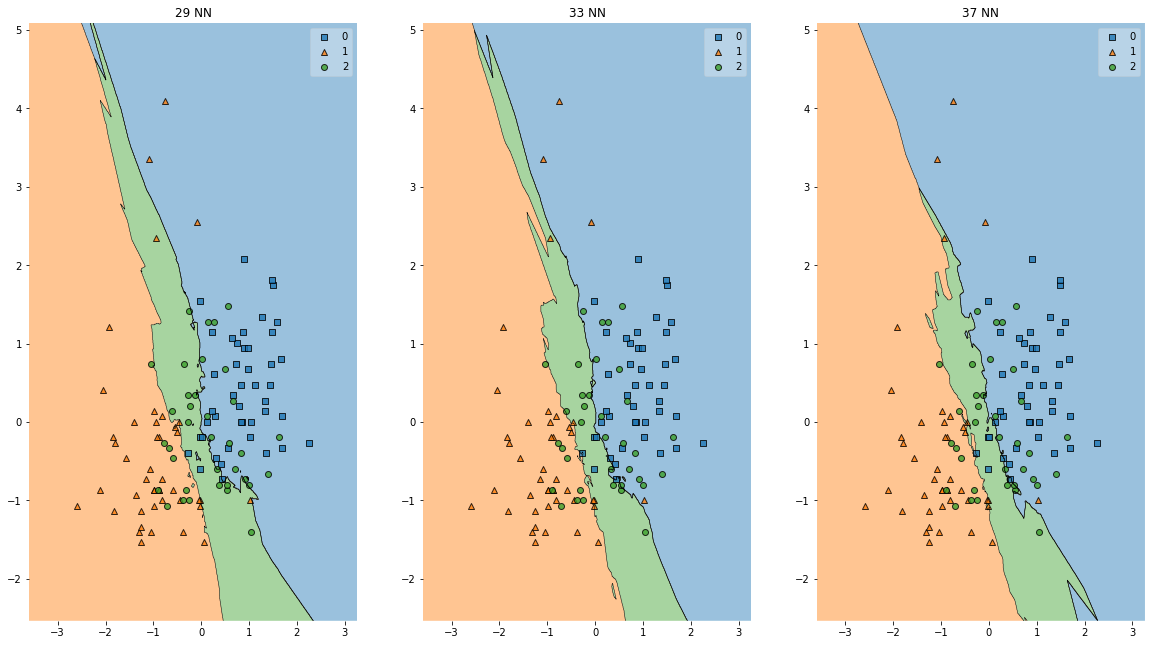

In [398]:
gs= gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(20,11))

labels = ['29 NN', '33 NN', '37 NN']
for Number, lab, grd in zip([29, 33, 37], labels, itertools.product([0, 1, 2], repeat=1)):

    ax = plt.subplot(gs[grd[0]])
    fig = plot_decision_regions(X=x_tr_s.to_numpy(), y=y_train, clf=KNeighborsClassifier(p=2, n_neighbors=Number).fit(x_tr_s.to_numpy(),y_train) , legend=1)
    plt.title(lab)

In [399]:
print('NN', 'Train', 'Test', sep='    ')
for i in [1, 3, 5, 10, 15, 25, 29, 33, 37]:
    knn = KNeighborsClassifier(p=2, n_neighbors=i)
    knn.fit(x_tr_s.to_numpy(), y_train)
    models.append(knn)
    train_pred = knn.predict(x_tr_s.to_numpy())
    test_pred = knn.predict(x_tst_s.to_numpy())
    print(i, accuracy_score(y_train, train_pred).round(3), accuracy_score(y_test, test_pred).round(3), sep ='     ')

NN    Train    Test
1     1.0     0.63
3     0.871     0.667
5     0.863     0.648
10     0.766     0.704
15     0.742     0.685
25     0.742     0.722
29     0.718     0.704
33     0.685     0.704
37     0.677     0.704


#### When the number of trees is small, our model overtrains. This can be seen both by the score (large train, small test) and by the solving surfaces, which look very 'jagged', the classes are intermingled with each other. As we can see, the most optimal k = 25. At this hyperparameter, the test score is maximized and there is almost no overtraining (0.742 on train, 0.722 on test). At k>=33 we can observe overgeneralization, since train score is smaller than test. 

### Assignment 2. KNN with your own hands. 2 Points

In this assignment we will try to realize KNN algorithm by our own hands. In this case we will try to make KNN for classification.

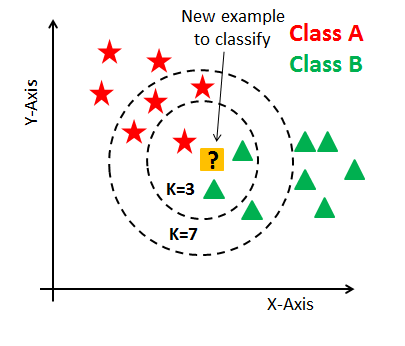

In [400]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
    
    def predict(self, X):
        prediction = []
        for x in X:
            distances = np.sqrt(np.sum((self.X - x) ** 2, axis=1))
            nearest_neighbors = self.y[distances.argsort()[:self.k]]
            most_common_label = Counter(nearest_neighbors).most_common(1)[0][0]
            prediction.append(most_common_label)
        return np.array(prediction)

In [401]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

If tests below are passed then everything is ok

In [402]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Assignment 3: Linear regression

In this assignment we will look at various aspects of constructing a linear model. We will be working with one of the classic data sets in statistics, containing information about diamonds. The description can be viewed [here](https://www.kaggle.com/shivam2503/diamonds).

In [403]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We will solve the problem of predicting the price of a diamond depending on its characteristics.

**Problem 3.1 (0.1 points)** Are there missing values in the data set? If yes, remove them.

In [404]:
data.isnull().sum().sum()

0

**Task 3.2 (0.1 points)** Are there meaningless columns in the data set (features that do not carry additional information)? If yes, then delete them.

In [405]:
data = data.drop('Unnamed: 0', axis=1)

In [406]:
data.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


**Task 3.3 (0.1 points)** Linear regression is based on the assumption of a linear relationship between the characteristics and the target variable, and therefore, before selecting variables for inclusion in the model, it makes sense to check to what extent this relationship is true. For the following points, we will also need sample correlations between features. Output a matrix of sample correlations between all real features and the target variable (that is, this matrix will have $k+1$ rows, where $k$ is the number of real features).

Which real features correlate most with the target variable?

In [407]:
import seaborn as sns

In [408]:
correlation = data.select_dtypes(include = 'number').corr()

<AxesSubplot:>

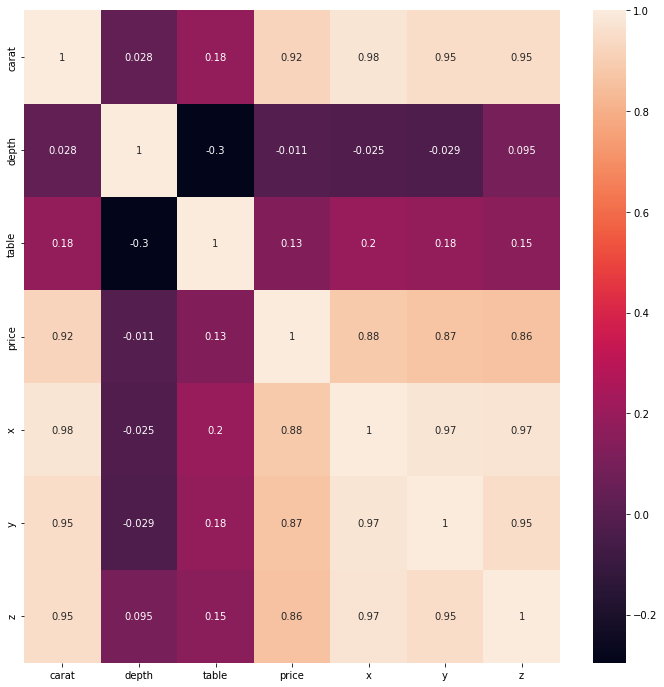

In [409]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation, annot = True)

#### The most correlated are carat, x, y, z

**Problem 3.4 (0.1 points)** Since the linear model adds feature values with some weights, we need to carefully handle categorical features. Code categorical variables using OneHot coding.

In [410]:
from sklearn.preprocessing import OneHotEncoder

In [411]:
encoder = OneHotEncoder(sparse = False,  drop = 'first')

In [412]:
cat_cols = data.select_dtypes(exclude = 'number').columns.to_list()

In [413]:
data_cod = encoder.fit_transform(data[cat_cols])


In [414]:
data_cod = pd.DataFrame(data_cod, columns = encoder.get_feature_names_out(cat_cols))

In [415]:
data_fin = pd.merge(data_cod, data.select_dtypes(include = 'number'), left_index=True, right_index=True)

**Problem 3.5 (0.2 points)** Divide the sample into training and test. Set the test sample share to 0.3.

In [416]:
from sklearn.model_selection import train_test_split

In [417]:
X = data_fin.drop(columns = ['price'])

In [418]:
y= data_fin['price']

In [419]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3301)

**Problem 3.6 (0.3 points)** Often, when using linear models, real features are scaled. In this case, coefficient estimates lose their direct statistical interpretation (“as $X_1$ increases by 1, $y$ increases by $w_1$”), but acquire properties useful in machine learning problems. In this task, scale the real features of the training and test samples using the `StandardScaler` module.

In [420]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

In [421]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Problem 3.7 (0.2 points)** Evaluate linear regression on the training set. Print the root mean square error on the training and test sets.

In [422]:
model = LinearRegression()

In [423]:
model.fit(X_train, y_train)

LinearRegression()

In [424]:
print('MSE Train', mse(y_train, model.predict(X_train)))
print('MSE Test', mse(y_test, model.predict(X_test)))


MSE Train 1264842.036742739
MSE Test 1307736.871624567


**Problem 3.8 (0.2 points)** Study the documentation of the `LinearRegression` module and output the resulting coefficient estimates. Name the real variables whose coefficient estimates in magnitude are an order of magnitude higher than the estimates of other real variables.

In [425]:
data_coef = pd.DataFrame(model.coef_,  index = X.columns.to_list() , columns = ['Коэффициенты'])

In [426]:
data_coef

,Коэффициенты
cut_Good,164.223468
cut_Ideal,413.823901
cut_Premium,337.060869
cut_Very Good,304.231041
color_E,-84.084941
color_F,-106.283766
color_G,-197.609522
color_H,-352.070036
color_I,-440.809069
color_J,-536.376522


#### Carat has the largest coefficient, x is also quite large

**Task 3.9 (0.4 points)** As can be seen from the analysis of the correlation matrix in task 3.3, there is a strong correlation between some characteristics, which may be an indicator of the problem of *multicollinearity*. The differences in the order of coefficients identified in the previous problem also hint at its presence. As you know, to solve this problem you can either exclude some features from the model or use regularization. We will use the second option.

Recall that the point of regularization is to change the loss function to eliminate problems caused by multicollinearity. With L1-regularization, it is proposed to minimize the following loss function:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

This model is called Lasso regression.

For L2 regularization, it is proposed to minimize the following loss function:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

This model is called Ridge regression.

Train Lasso regression and Ridge regression by setting the regularization hyperparameter to 10. To do this, use the `Lasso` and `Ridge` modules from `sklearn`. Have you lost a lot of weight? Conclude how much of a multicollinearity problem was present in the original regression.

In [427]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)


Ridge(alpha=10)

In [428]:
no_reg = pd.DataFrame(model.coef_, columns = ['no_reg'])
lasso_reg = pd.DataFrame(lasso.coef_, columns = ['lasso'])
ridge_reg = pd.DataFrame(ridge.coef_, columns = ['ridge'])

In [429]:
result_df = pd.concat([no_reg, lasso_reg ,ridge_reg ], axis=1)

In [430]:
result_df = result_df.set_index(pd.Index(X.columns.to_list()))

In [431]:
result_df

,no_reg,lasso,ridge
cut_Good,164.223468,40.153437,164.822574
cut_Ideal,413.823901,208.810466,414.972008
cut_Premium,337.060869,150.791575,338.031838
cut_Very Good,304.231041,134.158567,305.522565
color_E,-84.084941,-12.961287,-83.659290
color_F,-106.283766,-39.882166,-106.106654
color_G,-197.609522,-120.528608,-197.116255
color_H,-352.070036,-279.862330,-351.210132
color_I,-440.809069,-369.311792,-439.520611
color_J,-536.376522,-475.706535,-535.000498


In [432]:
print(np.sum(np.array((result_df['lasso'])**2)))
print(np.sum(np.array((result_df['no_reg'])**2)))
print(np.sum(np.array((result_df['ridge'])**2)))

29446991.417780858
43783004.908264376
42882612.60154584


#### We see that the lasso greatly underestimated the coefficients, while the ridge almost did not change (reduced a little)

In [433]:
def mse_f(model):
    print(f'{model} Train', mse(y_train, model.predict(X_train)))
    print(f'{model} Test', mse(y_test, model.predict(X_test)))
    

In [434]:
mse_f(model)
mse_f(lasso)
mse_f(ridge)

LinearRegression() Train 1264842.036742739
LinearRegression() Test 1307736.871624567
Lasso(alpha=10) Train 1323331.0322458246
Lasso(alpha=10) Test 1394026.6480522424
Ridge(alpha=10) Train 1264960.3975401293
Ridge(alpha=10) Test 1308723.8904358617


#### Regression did not lead to an improvement in the test result, we can say that multicollinearity does not interfere with our primary model very much

**Problem 3.10 (0.4 points)** As discussed in the seminars, Lasso regression can be used to select the most informative features. For the following values of the regularization parameter $\alpha$: 0.1, 1, 10, 100, 200 – train Lasso and Ridge regressions and plot the change in the Euclidean norm of weights (`np.linalg.norm()` versus the vector of coefficient estimates) in depending on the $\alpha$ parameter. As is known, the norm is a numerical characteristic of the magnitude of the vector, and therefore the norm can be used to judge how large the elements the vector of coefficient estimates contains.

Which method is more aggressive in reducing weight? Explain why Lasso regression is often used for feature selection.

In [435]:
alpha = [0.1, 1, 10, 100,  200]
lasso_norms = []
ridge_norms = []
for a in alpha: 
    lasso = Lasso(a).fit(X_train, y_train)
    ridge = Ridge(a).fit(X_train, y_train)
    lasso_norms.append(np.linalg.norm(lasso.coef_))
    ridge_norms.append(np.linalg.norm(ridge.coef_))

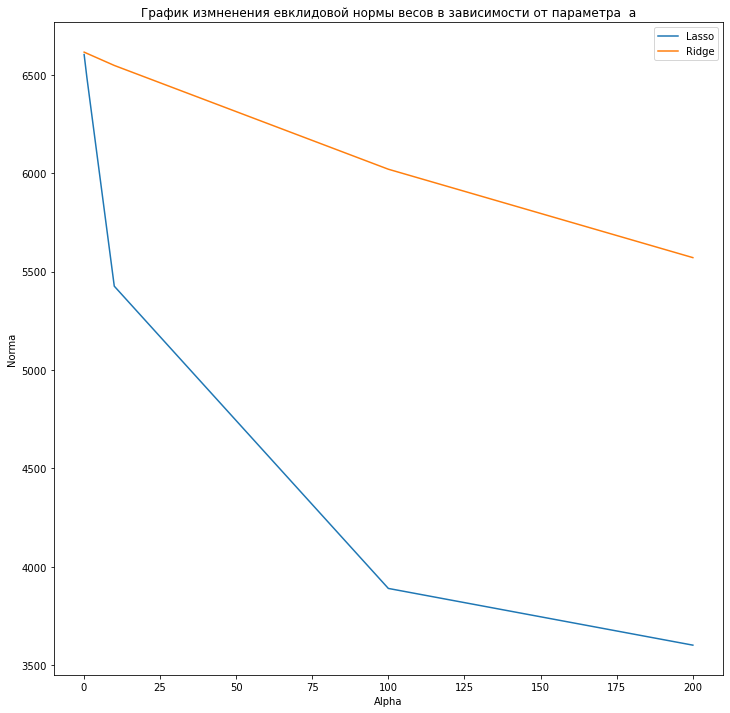

In [436]:
plt.figure(figsize=(12,12))
plt.title("График измненения евклидовой нормы весов в зависимости от параметра  a")
plt.plot(alpha, lasso_norms, label="Lasso")
plt.plot(alpha, ridge_norms, label="Ridge")
plt.ylabel("Norma")
plt.xlabel("Alpha")
plt.legend()

#### Lasso reduces weight very aggressively and unevenly, while Ridge reduces it gradually. Lasso is used for feature selection because it effectively nulls the weights. This can be seen in our example with diamonds, y is zeroed there

**Problem 3.11 (0.5 points)**
Depending on the value of the $\alpha$ parameter in Lasso regression, different coefficient estimates are set to zero. The optimal value of $\alpha$ can be selected, for example, using cross-validation using the training set.

To perform cross-validation, you can use the `LassoCV` module. This module accepts a list of $\alpha$ values (the `alphas` parameter) and, when trained, performs cross-validation for each value from this list, storing the MSE at each cross-validation site (the number of sites - the `cv` parameter) into an error matrix ( that is, the resulting matrix will have size `len(alphas)` $\times$ `cv`). After training the model, the error matrix can be obtained by accessing the `.mse_path_` attribute.

Note that the model may use $\alpha$ in a different order than you feed them to the function: to define the order, use the `.alphas_` attribute. Set the number of cross-validation sites (the `cv` parameter) to 5.

Average the errors for each $\alpha$ value (that is, across the rows of the error matrix) and select the value that gives the highest quality.

In [437]:
from sklearn.linear_model import LassoCV
grid = LassoCV(alphas = alpha, cv=5, verbose = 1).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.........................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [438]:
grid.mse_path_.mean(axis=1)

array([2125295.59709949, 1759758.03897849, 1327461.20190792,
       1270106.64229531, 1270929.62608649])

In [439]:
alpha

[0.1, 1, 10, 100, 200]

#### Maximum quality is obtained with alpha = 100

**Problem 3.12 (0.5 points)** Train the final Lasso regression with the selected $\alpha$ parameter on the training set. Print the resulting coefficients and comment on which features turned out to be uninformative and which were the most informative. Give a possible semantic explanation for this result.

In [440]:
lasso = Lasso(alpha=100).fit(X_train, y_train)

In [441]:
lasso_coef = pd.DataFrame(lasso.coef_,  index = X.columns.to_list() , columns = ['Коэффициенты'])

In [442]:
lasso_coef.sort_values(by='Коэффициенты', key = lambda x: x**2)

,Коэффициенты
cut_Good,-0.000000
x,0.000000
table,-0.000000
clarity_VS2,0.000000
y,0.000000
color_G,0.000000
z,0.000000
color_E,0.000000
cut_Very Good,0.000000
cut_Premium,0.000000


#### If you follow the logic of lasso regression, then informative ones are not nullified, non-informative ones are nulled. Zeroed features have a potentially weak effect on the price of a diamond. Of course, size (x, y, z) correlates with price, but we can assume that weight is still more important. In this case, such dimensional features can be cut off as correlated with other independent variables. Other signs presumably have a much weaker effect than weight. It can also be noted that supposedly the color of a diamond does not greatly affect its price, however, there are several colors that are not attractive. The same thing, but in the opposite direction with cut.

**Problem 3.13 (0.4 points)** Make predictions from the trained Lasso regression on the test set and compare the root mean square error with the error of the ordinary linear regression from Problem 3.7. Which model is better to use for predictions? Give a possible explanation for why one model was better than the other.

In [443]:
#3.7
model = LinearRegression()
model.fit(X_train, y_train)
print('MSE Train old model', mse(y_train, model.predict(X_train)))
print('MSE Test old model', mse(y_test, model.predict(X_test)))
# new model
print('MSE Train new model', mse(y_train, lasso.predict(X_train)))
print('MSE Test new model', mse(y_test, lasso.predict(X_test)))

MSE Train old model 1264842.036742739
MSE Test old model 1307736.871624567
MSE Train new model 1757917.9715179333
MSE Test new model 1840796.254609901


#### For predictions, it is better to use ordinary linear regression, since the test score is higher there. Perhaps, despite the correlation between two certain features, they are both actually useful in prediction, and the lasso simply nullified one of them. Perhaps almost all the features are actually important for the model; in this case, the lasso simply forced and unreasonably nullified a part.